# Housekeeping

This notebook is used to verify the energy calibration from the Eu152 data (notebook: 152Eu_crytal-calibration.ipynb) by checking it on the K47 data.

# Setup Code

In [157]:
using Plots, DelimitedFiles,LsqFit

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

In [158]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

## Import Eu152 Calibration Data

In [159]:
numcrystals = 11
# Open XML containing Eu152 calibration data as readonly
io = open("calibrations/Eu152-calibration.xml", "r")
# Read in XML line by line
lines = readlines(io)

Eu152_calibrations = []

for i in range(0,numcrystals-1,step=1)
    #Only save lines that contain fit parameters, separate values by tab delimiter
    substring = split(lines[3+i*6], "     ")
    #broadcast conversion of the parameters from strings into Floats
    params = parse.(Float64, substring)
    #append these parameters to the calibrations vector
    push!(Eu152_calibrations, params)
end

In [160]:
#clover 0
fitc0c1,fitc0c2,fitc0c3 = Eu152_calibrations[1],Eu152_calibrations[2],Eu152_calibrations[3]

#clover 1
fitc1c0,fitc1c1,fitc1c2,fitc1c3 = Eu152_calibrations[4],Eu152_calibrations[5],Eu152_calibrations[6],Eu152_calibrations[7]

#clover 2
fitc2c0,fitc2c1,fitc2c2,fitc2c3 = Eu152_calibrations[8],Eu152_calibrations[9],Eu152_calibrations[10],Eu152_calibrations[11]

([1.2233033220554088, 0.18154438450868368], [1.3664555944247094, 0.17796192195252858], [1.0971101013106295, 0.18276644211243234], [0.5739910776395256, 0.1809434419863421])

# Clover 0

## Crystal 1 (c0c1)

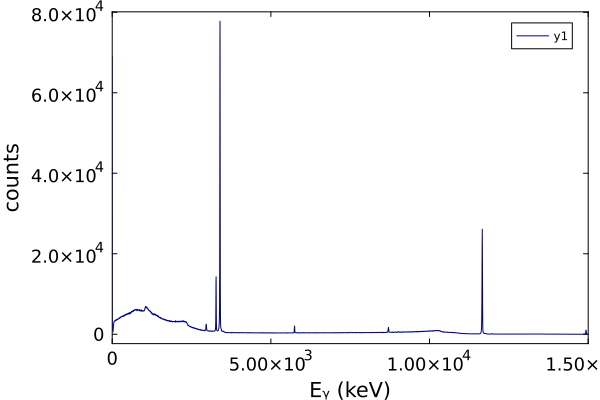

In [109]:
kc0c1 = readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')
kc0c1cal = [ fitc0c1[1].+kc0c1[:,1].*fitc0c1[2] kc0c1[:,2] ] 

# Plot uncalibrated histogram
plot(kc0c1[:,1],kc0c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

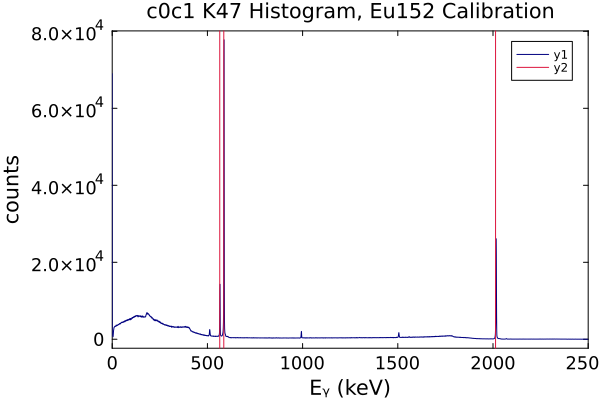

In [110]:
# Plot K47 data with energy cal from Eu152
plot(kc0c1cal[:,1],kc0c1cal[:,2],xlims=(0,2500),xlabel="Eᵧ (keV)")
vline!(kliterature,lc=:crimson)
title!("c0c1 K47 Histogram, Eu152 Calibration")

### Peak 1 (565)

P1 = -905.681502000572(3875.548819732085)
P2 = 3.2844438187872633(6.866529598620028)
P3 = 29855.039371758172(438.48414653567244)
P4 = 565.8792820189894(0.013047720060843973)
P5 = 0.8809402770123596(0.013677601060691075)
Calibrated - Expected = 1.0892820189894792 keV


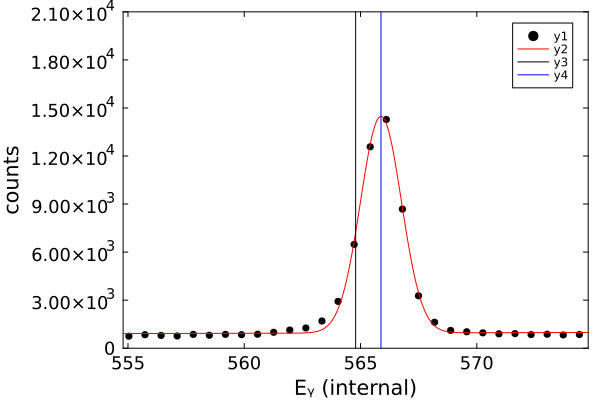

In [111]:
c0c1_p1_mean = kliterature[1]
c0c1_x1low,c0c1_x1high=c0c1_p1_mean-10,c0c1_p1_mean+10; ylow,yhigh=0,21000
c0c1_param1=[0.1,0.000005,1000,c0c1_p1_mean,1.0]

c0c1_p1,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1cal,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p1)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p1[4] - kliterature[1]) keV")

scatter(kc0c1cal[:,1],kc0c1cal[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p1),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 1691.5747171658786(24184.99396903887)
P2 = 0.2819501150948228(41.28010726942234)
P3 = 175163.77742960508(2652.940336339496)
P4 = 587.2487956983871(0.013579604835994089)
P5 = 0.8897270899809379(0.014238382061749724)
Calibrated - Expected = 1.2387956983870936 keV


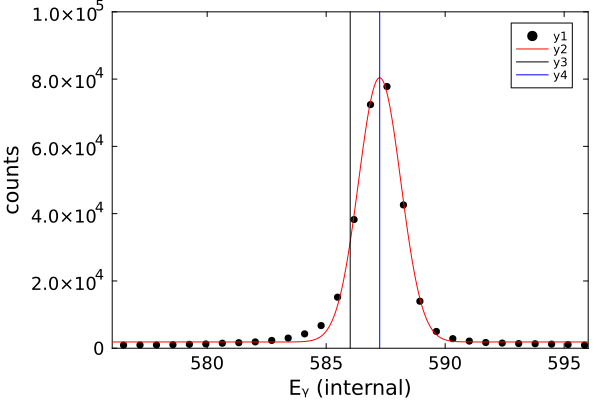

In [112]:
c0c1_p2_mean = kliterature[2]
c0c1_x1low,c0c1_x1high=c0c1_p2_mean-10,c0c1_p2_mean+10; ylow,yhigh=0,100000
c0c1_param1=[0.1,0.000005,1000,c0c1_p2_mean+3,1.0]

c0c1_p2,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1cal,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p2)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p2[4] - kliterature[2]) keV")

scatter(kc0c1cal[:,1],kc0c1cal[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p2),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 42730.67250384527(62891.548643546106)
P2 = -20.839190565552105(31.211534722769237)
P3 = 78807.72467864971(1814.239204829548)
P4 = 2016.7669832179477(0.025295292165842944)
P5 = -1.2690943288228986(0.027999116089473176)
Calibrated - Expected = 3.316983217947609 keV


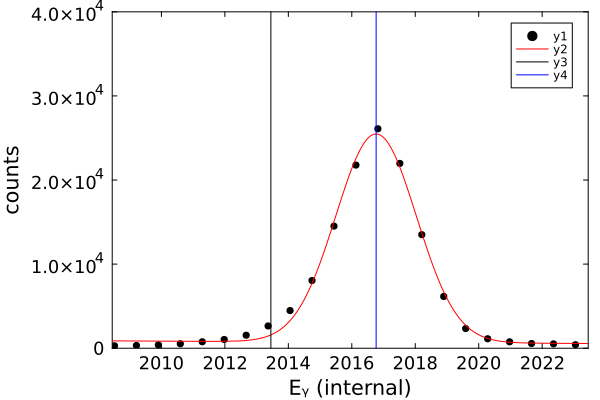

In [113]:
c0c1_p3_mean = kliterature[3]
c0c1_x1low,c0c1_x1high=c0c1_p3_mean-5,c0c1_p3_mean+10; ylow,yhigh=0,40000
c0c1_param1=[0.1,0.000005,1000,c0c1_p3_mean,1.0]

c0c1_p3,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1cal,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p3)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p3[4] - kliterature[3]) keV")

scatter(kc0c1cal[:,1],kc0c1cal[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p3),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p3[4]],lc=:blue)

### Residuals

In [114]:
c0c1_means=[c0c1_p1[4],c0c1_p2[4],c0c1_p3[4]]

3-element Vector{Float64}:
  565.8792820189894
  587.2487956983871
 2016.7669832179477

Residuals trendline: y = -0.0015*x + -0.3012


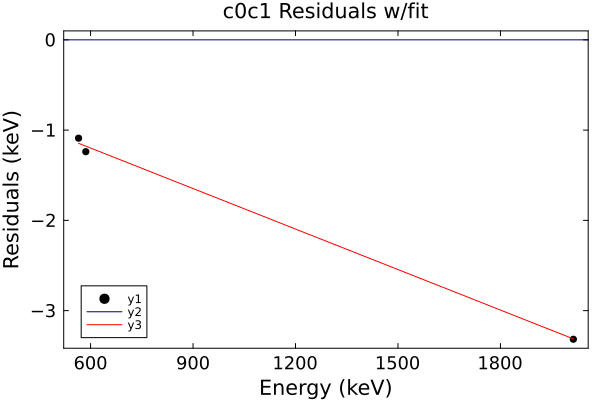

In [206]:
c0c1_residuals = kliterature .- c0c1_means

@. linearfit(e,p)=p[1]+p[2]*e
residuals_fitc0c1=curve_fit(linearfit,c0c1_means,c0c1_residuals,[-1,-0.001])

println("Residuals trendline: y = $(round(residuals_fitc0c1.param[2],digits=4))*x + $(round(residuals_fitc0c1.param[1],digits=4))") 

scatter(kliterature,c0c1_residuals,xlabel="Energy (keV)",ylabel="Residuals (keV)")
hline!([0])
plot!(e->linearfit(e,residuals_fitc0c1.param),lc=:red)
title!("c0c1 Residuals w/fit")

## Crystal 2 (c0c2)

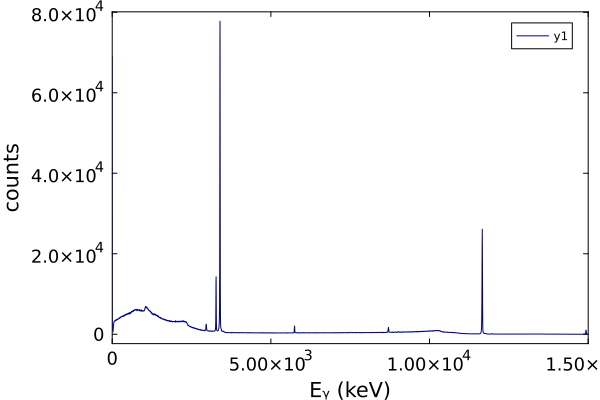

In [129]:
kc0c2 = readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')
kc0c2cal = [ fitc0c2[1].+kc0c2[:,1].*fitc0c2[2] kc0c2[:,2] ] 

# Plot uncalibrated histogram
plot(kc0c2[:,1],kc0c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

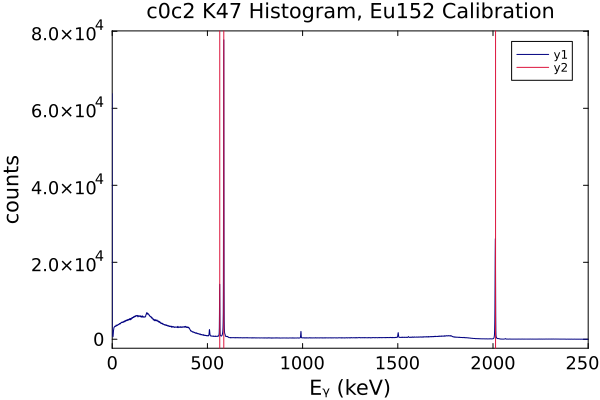

In [130]:
# Plot K47 data with energy cal from Eu152
plot(kc0c2cal[:,1],kc0c2cal[:,2],xlims=(0,2500),xlabel="Eᵧ (keV)")
vline!(kliterature,lc=:crimson)
title!("c0c2 K47 Histogram, Eu152 Calibration")

### Peak 1 (565)

P1 = 2211.3156668192455(3826.584346298489)
P2 = -2.2305262612087997(6.77590292763978)
P3 = 29792.61503430328(430.84180092393444)
P4 = 564.3984036115007(0.012894961111986639)
P5 = -0.8790565315990584(0.013486488273413465)
Calibrated - Expected = -0.39159638849923795 keV


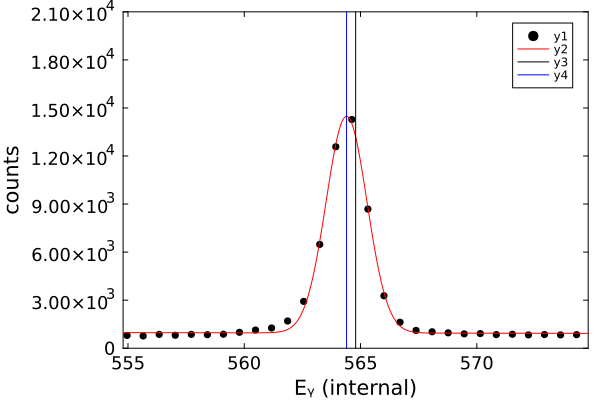

In [131]:
c0c2_p1_mean = kliterature[1]
c0c2_x1low,c0c2_x1high=c0c2_p1_mean-10,c0c2_p1_mean+10; ylow,yhigh=0,21000
c0c2_param1=[0.1,0.000005,1000,c0c2_p1_mean,1.0]

c0c2_p1,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2cal,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p1)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p1[4] - kliterature[1]) keV")

scatter(kc0c2cal[:,1],kc0c2cal[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p1),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 25624.552691661393(23809.12961531049)
P2 = -40.57221515946199(40.6190245658346)
P3 = 174764.9955493011(2599.0218827638564)
P4 = 585.7222578319662(0.013369806494305983)
P5 = -0.8876963154502345(0.013991110606651215)
Calibrated - Expected = -0.2877421680337875 keV


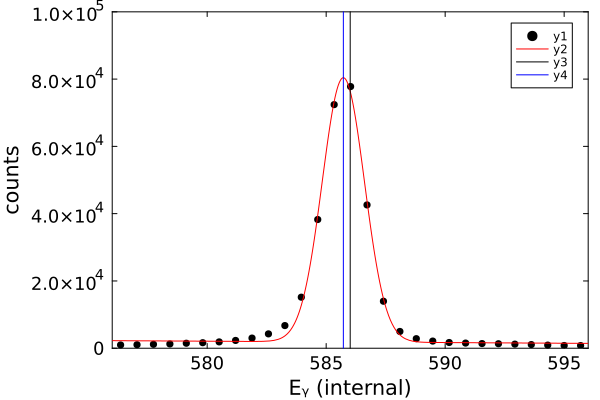

In [132]:
c0c2_p2_mean = kliterature[2]
c0c2_x1low,c0c2_x1high=c0c2_p2_mean-10,c0c2_p2_mean+10; ylow,yhigh=0,100000
c0c2_param1=[0.1,0.000005,1000,c0c2_p2_mean+3,1.0]

c0c2_p2,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2cal,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p2)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p2[4] - kliterature[2]) keV")

scatter(kc0c2cal[:,1],kc0c2cal[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p2),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 195024.13607612494(75945.65212225857)
P2 = -96.42305141830307(37.72740772961816)
P3 = 76554.74308073537(1710.7404123275871)
P4 = 2012.1818264949059(0.022788868893556524)
P5 = -1.2423335641313258(0.025667384598474126)
Calibrated - Expected = -1.2681735050941825 keV


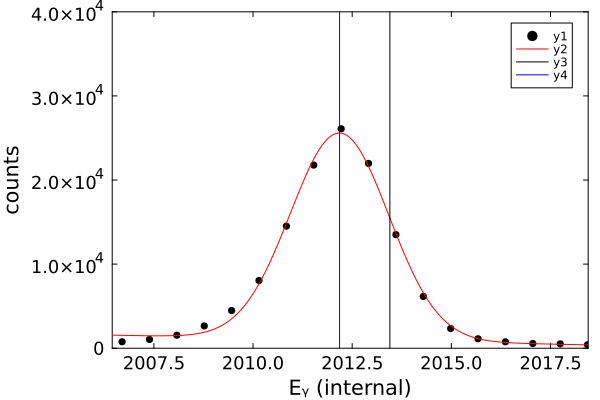

In [133]:
c0c2_p3_mean = kliterature[3]
c0c2_x1low,c0c2_x1high=c0c2_p3_mean-7,c0c2_p3_mean+5; ylow,yhigh=0,40000
c0c2_param1=[0.1,0.000005,1000,c0c2_p3_mean-2,1.0]

c0c2_p3,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2cal,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p3)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p3[4] - kliterature[3]) keV")

scatter(kc0c2cal[:,1],kc0c2cal[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p3),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p3[4]],lc=:blue)

### Residuals

In [134]:
c0c2_means=[c0c2_p1[4],c0c2_p2[4],c0c2_p3[4]]

3-element Vector{Float64}:
  564.3984036115007
  585.7222578319662
 2012.1818264949059

Residuals trendline: y = 0.0006*x + -0.0309


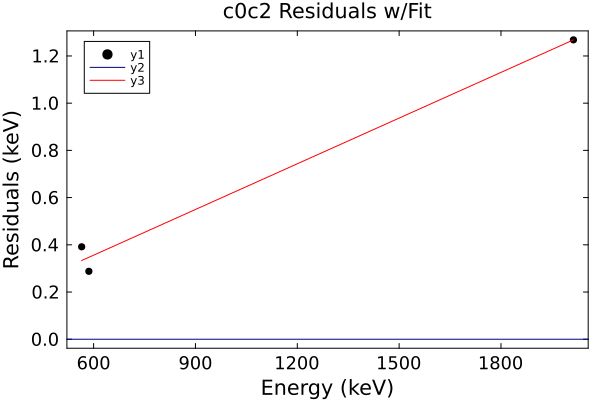

In [207]:
c0c2_residuals = kliterature .- c0c2_means

@. linearfit(e,p)=p[1]+p[2]*e
residuals_fitc0c2=curve_fit(linearfit,c0c2_means,c0c2_residuals,[-1,-0.001])

println("Residuals trendline: y = $(round(residuals_fitc0c2.param[2],digits=4))*x + $(round(residuals_fitc0c2.param[1],digits=4))") 

scatter(kliterature,c0c2_residuals,xlabel="Energy (keV)",ylabel="Residuals (keV)")
hline!([0])
plot!(e->linearfit(e,residuals_fitc0c2.param),lc=:red)
title!("c0c2 Residuals w/Fit")

## Crystal 3 (c0c3)

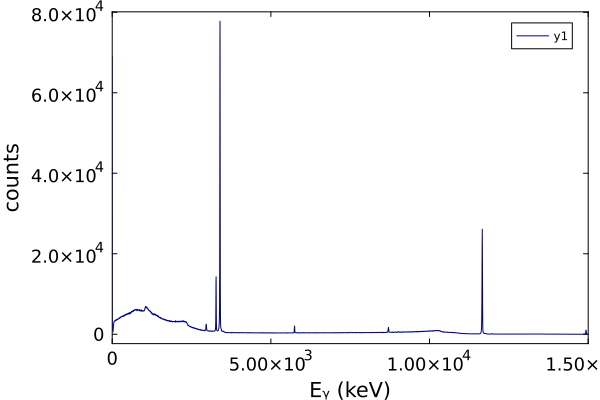

In [161]:
kc0c3 = readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')
kc0c3cal = [ fitc0c3[1].+kc0c3[:,1].*fitc0c3[2] kc0c3[:,2] ] 

# Plot uncalibrated histogram
plot(kc0c3[:,1],kc0c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

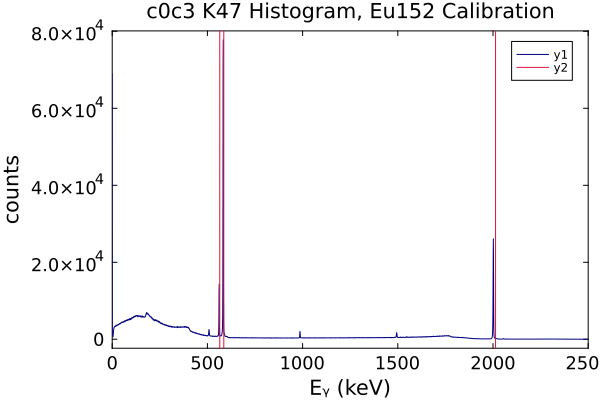

In [162]:
# Plot K47 data with energy cal from Eu152
plot(kc0c3cal[:,1],kc0c3cal[:,2],xlims=(0,2500),xlabel="Eᵧ (keV)")
vline!(kliterature,lc=:crimson)
title!("c0c3 K47 Histogram, Eu152 Calibration")

### Peak 1 (565)

P1 = 7539.405162575147(6173.617479205244)
P2 = -11.606936683599645(10.975767480739705)
P3 = 29309.3225749485(475.0639009005036)
P4 = 561.6349521081776(0.013592558059556167)
P5 = 0.8675849994196124(0.014459179172158873)
Calibrated - Expected = -3.1550478918223916 keV


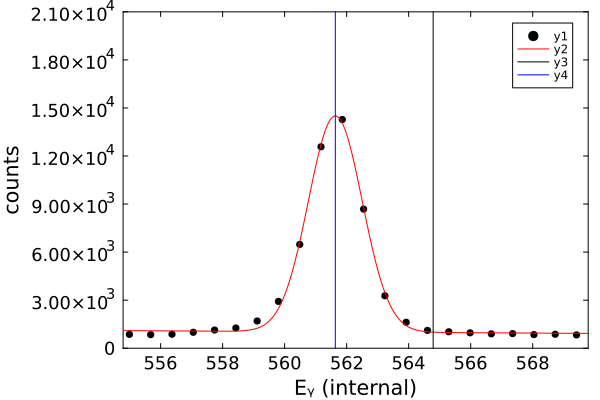

In [170]:
c0c3_p1_mean = kliterature[1]
c0c3_x1low,c0c3_x1high=c0c3_p1_mean-10,c0c3_p1_mean+5; ylow,yhigh=0,21000
c0c3_param1=[0.1,0.000005,1000,c0c3_p1_mean-2,1.0]

c0c3_p1,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3cal,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p1)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p1[4] - kliterature[1]) keV")

scatter(kc0c3cal[:,1],kc0c3cal[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p1),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -10397.627626325531(24293.279448842317)
P2 = 21.102269960631972(41.84301375993334)
P3 = 173651.50923022488(2647.924521445464)
P4 = 582.8427093896602(0.013436137325029143)
P5 = 0.8823813943170099(0.014138919685946662)
Calibrated - Expected = -3.167290610339819 keV


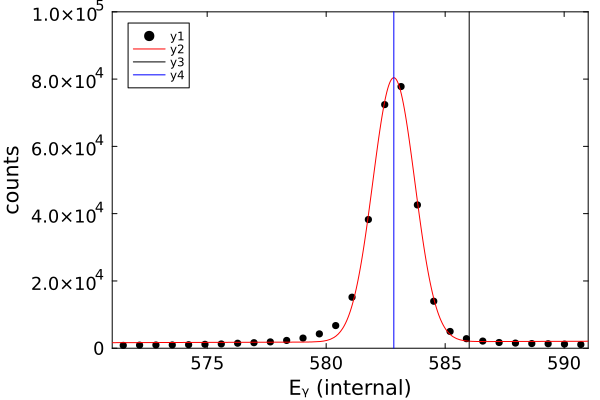

In [185]:
c0c3_p2_mean = kliterature[2]
c0c3_x1low,c0c3_x1high=c0c3_p2_mean-15,c0c3_p2_mean+5; ylow,yhigh=0,100000
c0c3_param1=[0.1,0.0005,1000,c0c3_p2_mean-2.5,1.0]

c0c3_p2,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3cal,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p2)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p2[4] - kliterature[2]) keV")

scatter(kc0c3cal[:,1],kc0c3cal[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p2),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 69767.62142434882(34695.73054595667)
P2 = -34.5331676411776(17.313916636235597)
P3 = 78646.01622274963(1398.625537274847)
P4 = 2001.7568325610375(0.021027231254412245)
P5 = 1.2643357480681332(0.02264528742785834)
Calibrated - Expected = -11.693167438962519 keV


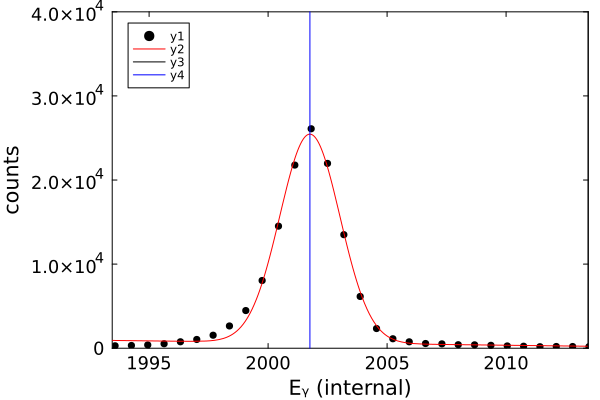

In [190]:
c0c3_p3_mean = kliterature[3]
c0c3_x1low,c0c3_x1high=c0c3_p3_mean-20,c0c3_p3_mean; ylow,yhigh=0,40000
c0c3_param1=[0.1,0.000005,1000,c0c3_p3_mean-10,1.0]

c0c3_p3,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3cal,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p3)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p3[4] - kliterature[3]) keV")

scatter(kc0c3cal[:,1],kc0c3cal[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p3),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p3[4]],lc=:blue)

### Residuals

In [191]:
c0c3_means=[c0c3_p1[4],c0c3_p2[4],c0c3_p3[4]]

3-element Vector{Float64}:
  561.6349521081776
  582.8427093896602
 2001.7568325610375

Residuals trendline: y = 0.006*x + -0.2533


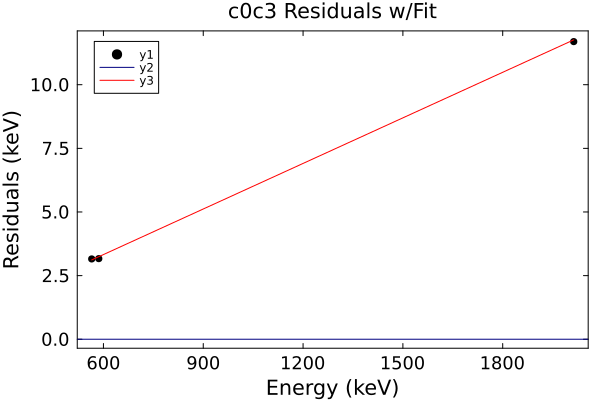

In [208]:
c0c3_residuals = kliterature .- c0c3_means

@. linearfit(e,p)=p[1]+p[2]*e
residuals_fitc0c3=curve_fit(linearfit,c0c3_means,c0c3_residuals,[-1,-0.001])

println("Residuals trendline: y = $(round(residuals_fitc0c3.param[2],digits=4))*x + $(round(residuals_fitc0c3.param[1],digits=4))") 

scatter(kliterature,c0c3_residuals,xlabel="Energy (keV)",ylabel="Residuals (keV)")
hline!([0])
plot!(e->linearfit(e,residuals_fitc0c3.param),lc=:red)
title!("c0c3 Residuals w/Fit")

# Clover 1